In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


# df = pd.read_csv('with_author_details.csv')
# df['author_type'] = df.author_type.apply(lambda x: 1 if x=='User' else 0)
# df = df.astype('int')
df = pd.read_csv('fullset_with_more_fields.csv')
print(df.shape)
df.describe().transpose()


(1000, 30)


,count,mean,std,min,25%,50%,75%,max
size,1000.0,199226.340,846638.455504,0.0,5786.00,28333.0,126320.50,20994814.0
stars,1000.0,39561.415,32451.052917,20578.0,23556.25,29062.5,42029.75,367165.0
forks_count,1000.0,7397.526,9300.397495,391.0,2625.75,4660.0,8277.50,88367.0
open_issues,1000.0,574.623,1451.955884,0.0,49.00,182.0,515.50,24417.0
num_topics,1000.0,7.240,5.727233,0.0,3.00,6.0,10.00,20.0
desc_word_count,1000.0,10.263,9.005383,0.0,5.00,8.0,13.00,168.0
created_at,1000.0,402322.927,27033.378230,335516.0,384127.00,401807.5,421794.75,467499.0
updated_at,1000.0,467977.220,6.655817,467879.0,467977.00,467979.0,467979.00,467980.0
pushed_at,1000.0,467173.160,2520.037085,437590.0,467537.75,467908.0,467973.25,467980.0
has_homepage,1000.0,0.717,0.450682,0.0,0.00,1.0,1.00,1.0


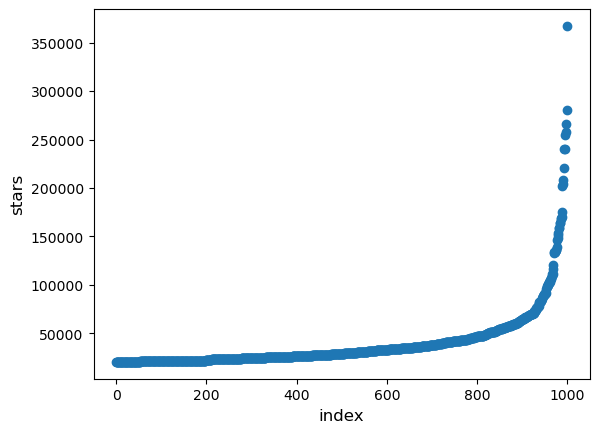

In [2]:
def plot_feature(df, col):
    plt.scatter(range(df.shape[0]), np.sort(df[col].values))
    plt.xlabel('index', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.show()

plot_feature(df, "stars")


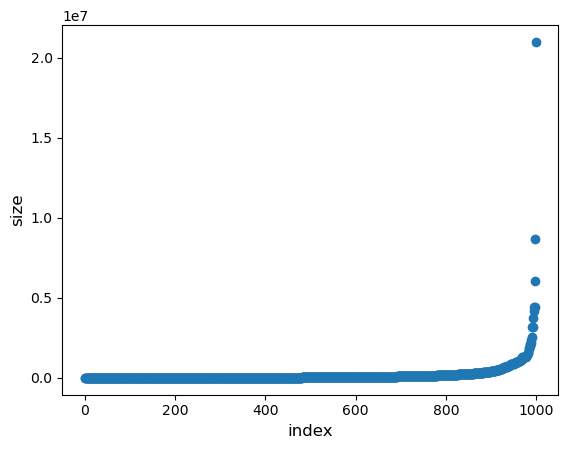

In [3]:
plot_feature(df, "size")

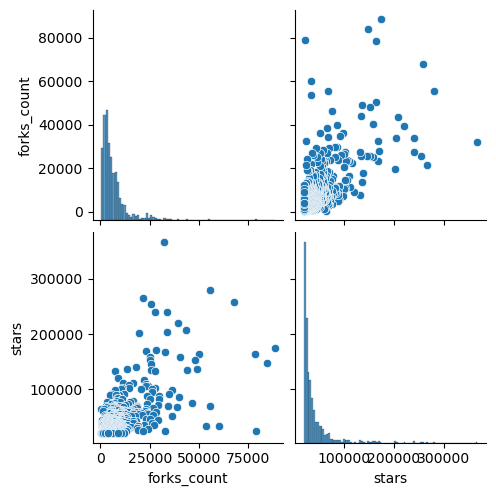

In [4]:
import seaborn as sns

df1 = pd.DataFrame()
df1['forks_count'] = df['forks_count']
df1['stars'] = df['stars']
sns.pairplot(df1)


In [13]:
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('fullset_with_more_fields.csv')
for column in df.columns:
    df = df.drop(df[df[str(column)] == 'ERROR'].index)
df['author_type'] = df.author_type.apply(lambda x: 1 if x=='User' else 0)
df = df.astype('int')
X = df.drop(['stars'], axis=1)
y = df['stars']


# create a base classifier used to evaluate a subset of attributes
model = RandomForestRegressor(n_jobs=-1, n_estimators=200, verbose=1, random_state=42)

# create the RFE model and select amount of features
rfe = RFE(model, n_features_to_select=25)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
#print(rfe.feature_names_in_)


df = pd.read_csv('fullset_with_more_fields.csv')
for column in df.columns:
    df = df.drop(df[df[str(column)] == 'ERROR'].index)
df['author_type'] = df.author_type.apply(lambda x: 1 if x=='User' else 0)
df = df.astype('int')
df2 = df.drop(['stars'], axis=1)
n = 0
lis = df2.columns
for i in list(lis):
    if rfe.support_[n] == False:
        df2 = df2.drop([i],axis=1)
        n+=1
    else:
        n+=1
        
Cla = df['stars']


df2['stars'] = Cla
df2.to_csv('1000random_updated.csv')


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1

[ True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True False False  True  True  True  True  True  True
  True False  True  True  True]
[1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 2 3 1 1 1 1 1 1 1 5 1 1 1]


[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.4s finished


0                size
26     apache_license
24        mit_license
23       has_homepage
22          pushed_at
21         updated_at
20         created_at
19    desc_word_count
18     other_language
15         typescript
27      other_license
13         num_topics
14         javascript
11           comments
10            commits
9        contributors
8         author_type
7     has_discussions
6        has_projects
4           has_pages
3            has_wiki
2         open_issues
1         forks_count
12        deployments
28     remain_license
16             python
17               rust
5          has_issues
25        nan_license
Name: Features, dtype: object


<Axes: xlabel='Ranking', ylabel='Features'>

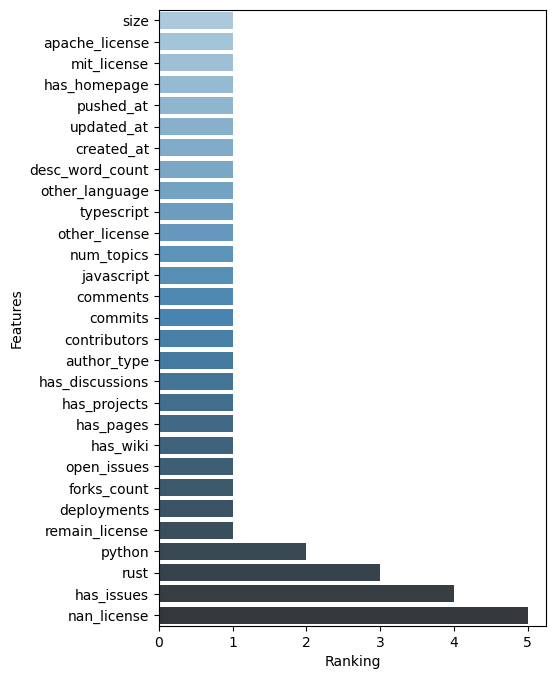

In [14]:
import seaborn as sns
Ranking = rfe.ranking_
Features = rfe.feature_names_in_
df = pd.DataFrame({"Features":Features,"Ranking":Ranking})
orders=df.sort_values('Ranking').Features
print(orders)

plt.figure(figsize=(5,8))
sns.barplot(x='Ranking', y="Features", data=df, order=df.sort_values('Ranking').Features, palette="Blues_d")

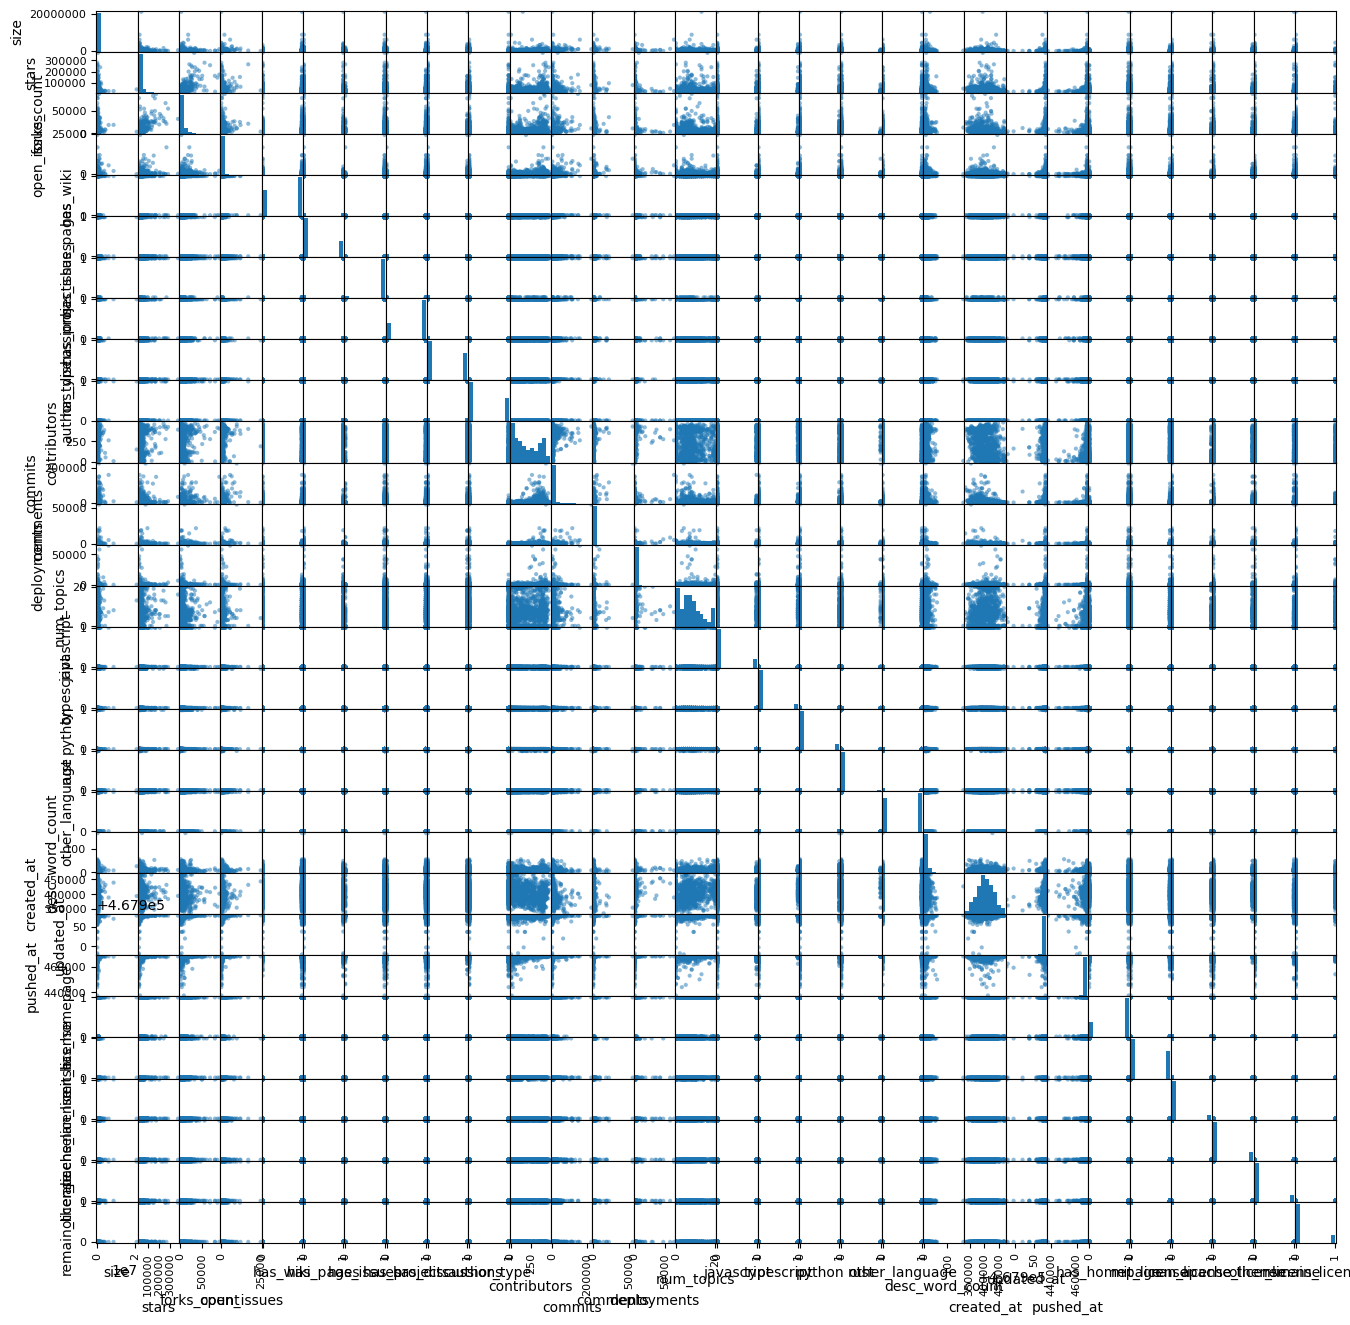

In [5]:
#df = pd.read_csv('with_author_details.csv')
#df['author_type'] = df.author_type.apply(lambda x: 1 if x=='User' else 0)
#
df = pd.read_csv('fullset_with_more_fields.csv')
for column in df.columns:
    df = df.drop(df[df[str(column)] == 'ERROR'].index)
df['author_type'] = df.author_type.apply(lambda x: 1 if x=='User' else 0)
df = df.astype('int')
pd.plotting.scatter_matrix(df,figsize=(16,16));


      Iter       Train Loss   Remaining Time 
         1   884165677.9153            1.00s
         2   788470664.4008            0.99s
         3   713695450.3068            0.99s
         4   648602879.8325            0.93s
         5   595806937.8185            0.94s
         6   552059370.0165            0.90s
         7   515413507.9445            0.91s
         8   485311521.7943            0.89s
         9   459755757.0076            0.89s
        10   438159333.8403            0.88s
        20   319544796.6348            0.85s
        30   269561111.0313            0.83s
        40   243101288.2768            0.82s
        50   219805726.6041            0.80s
        60   206042558.2593            0.78s
        70   190500946.9525            0.77s
        80   182817712.2043            0.77s
        90   173975103.0102            0.77s
       100   167094677.1296            0.75s
       200   116521962.8722            0.57s
       300    90195357.1470            0.37s
       40

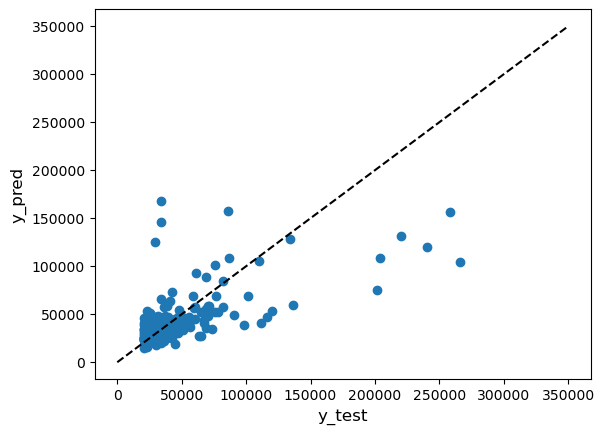

test set performance:  0.44281288445332145


In [9]:
from joblib import dump, load
from numpy import loadtxt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor

# load the dataset
#dataset = pd.read_csv('1000random.csv')
dataset = pd.read_csv('fullset_with_more_fields.csv')
for column in dataset.columns:
    dataset = dataset.drop(dataset[dataset[str(column)] == 'ERROR'].index)
dataset['author_type'] = dataset.author_type.apply(lambda x: 1 if x=='User' else 0)
#dataset = pd.read_csv('with_author_details.csv')
#dataset['author_type'] = dataset.author_type.apply(lambda x: 1 if x=='User' else 0)
X = dataset.drop(['stars'] , axis =1)
y = dataset.stars

s = StandardScaler()
X = s.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
clf = GradientBoostingRegressor(verbose = 1, n_estimators = 500,max_depth=2,random_state=42)
clf.fit(X_train, y_train)

test_score = r2_score(y_test, clf.predict(X_test))
plt.scatter(y_test, clf.predict(X_test))
plt.xlabel('y_test', fontsize=12)
plt.ylabel('y_pred', fontsize=12)
xlim = [0, 350000]
ylim = [0, 350000]
plt.plot(xlim, ylim, '--k')
plt.savefig('gradientBoost.png')
plt.show()

print("test set performance: ", test_score)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished


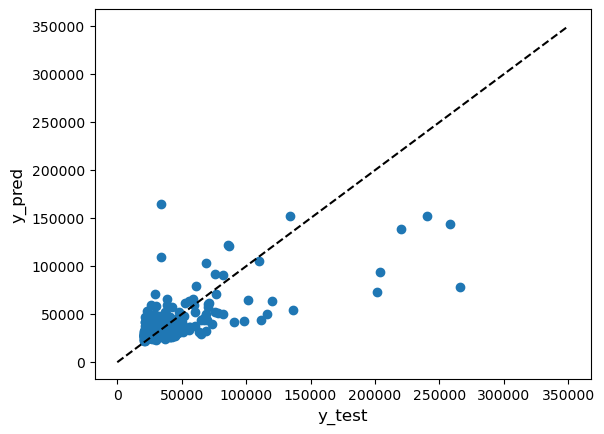

test set performance:  0.47879953030133926


In [4]:
from joblib import dump, load
from numpy import loadtxt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

# load the dataset
#dataset = pd.read_csv('1000random_updated.csv',index_col=0)
dataset = pd.read_csv('fullset_with_more_fields.csv')
for column in dataset.columns:
    dataset = dataset.drop(dataset[dataset[str(column)] == 'ERROR'].index)
dataset['author_type'] = dataset.author_type.apply(lambda x: 1 if x=='User' else 0)

X = dataset.drop(['stars'] , axis =1)
y = dataset.stars

s = StandardScaler()
X = s.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)
clf = RandomForestRegressor(n_jobs=-1, n_estimators=200, verbose=1,random_state=42)
clf.fit(X_train, y_train)



test_score = r2_score(y_test, clf.predict(X_test))
plt.scatter(y_test, clf.predict(X_test))
plt.xlabel('y_test', fontsize=12)
plt.ylabel('y_pred', fontsize=12)
xlim = [0, 350000]
ylim = [0, 350000]
plt.plot(xlim, ylim, '--k')
plt.savefig('gradientBoost.png')
plt.show()

print("test set performance: ", test_score)


In [36]:
from joblib import dump, load
from numpy import loadtxt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

# load the dataset
#dataset = pd.read_csv('1000random_updated.csv',index_col=0)
dataset = pd.read_csv('fullset_with_more_fields.csv')
for column in dataset.columns:
    dataset = dataset.drop(dataset[dataset[str(column)] == 'ERROR'].index)
dataset['author_type'] = dataset.author_type.apply(lambda x: 1 if x=='User' else 0)

X = dataset.drop(['stars','author_type'] , axis =1)
y = dataset.stars

s = StandardScaler()
X = s.fit_transform(X)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
clf = RandomForestRegressor(n_jobs=-1, n_estimators=200, verbose=1)
clf.fit(X, y)



from sklearn.model_selection import cross_val_score
scores=cross_val_score(clf, X, y, cv=10,scoring='r2')
print(scores.mean())

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 189 out of 200 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: D

-395.78829863615186


[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished


20


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished


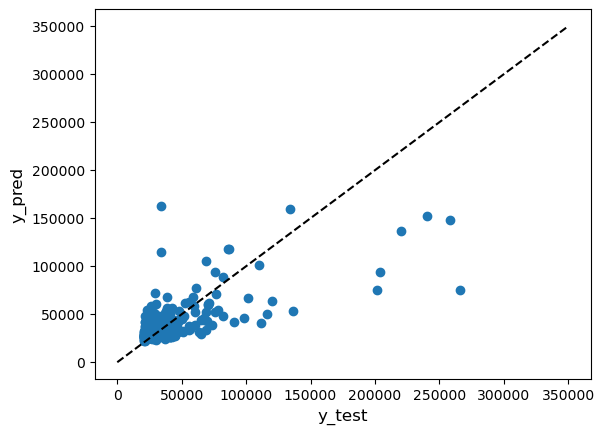

test set performance:  0.47518705488360446


In [13]:
from sklearn.feature_selection import VarianceThreshold
from joblib import dump, load
from numpy import loadtxt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

dataset = pd.read_csv('fullset_with_more_fields.csv')
for column in dataset.columns:
    dataset = dataset.drop(dataset[dataset[str(column)] == 'ERROR'].index)
dataset['author_type'] = dataset.author_type.apply(lambda x: 1 if x=='User' else 0)

X = dataset.drop(['stars'] , axis =1)
y = dataset.stars

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = sel.fit_transform(X)

s = StandardScaler()
X = s.fit_transform(X)
print(len(X[0]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)
clf = RandomForestRegressor(n_jobs=-1, n_estimators=200, verbose=1,random_state=42)
clf.fit(X_train, y_train)



test_score = r2_score(y_test, clf.predict(X_test))
plt.scatter(y_test, clf.predict(X_test))
plt.xlabel('y_test', fontsize=12)
plt.ylabel('y_pred', fontsize=12)
xlim = [0, 350000]
ylim = [0, 350000]
plt.plot(xlim, ylim, '--k')
plt.savefig('gradientBoost.png')
plt.show()

print("test set performance: ", test_score)

